In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



%config InlineBackend.figure_format = 'retina'

In [2]:
import torch
from second.test_kitti import depth_to_3D, init_depth_from_feature
from second.protos import pipeline_pb2
from google.protobuf import text_format

from second.pytorch.builder import (box_coder_builder, input_reader_builder,
                                    lr_scheduler_builder, optimizer_builder,
                                    second_builder)
from second.pytorch.train import build_network


from second.sphere.visual import *
from second.sphere.transform import *

In [5]:
#config
config_path="configs/car.fhd.config"
config = pipeline_pb2.TrainEvalPipelineConfig()
with open(config_path, "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, config)
input_cfg = config.train_input_reader
eval_input_cfg = config.eval_input_reader
model_cfg = config.model.second
train_cfg = config.train_config

In [9]:
# build all objects
device="cuda"
net = build_network(model_cfg, False).to(device)
target_assigner = net.target_assigner
voxel_generator = net.voxel_generator

dataset = input_reader_builder.build(
    input_cfg,
    model_cfg,
    training=True,
    voxel_generator=voxel_generator,
    target_assigner=target_assigner,
    multi_gpu=False)

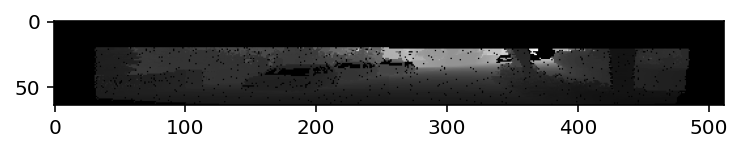

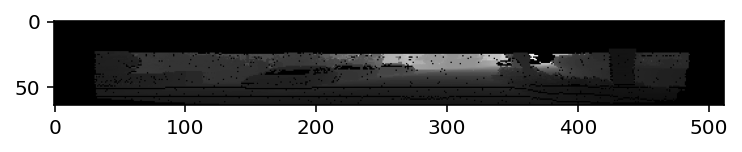

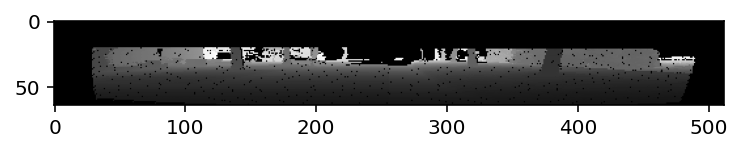

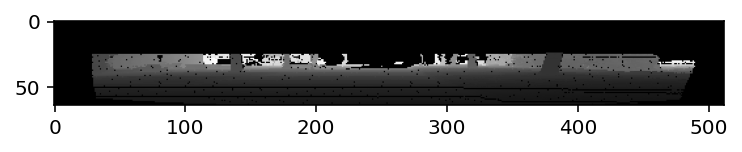

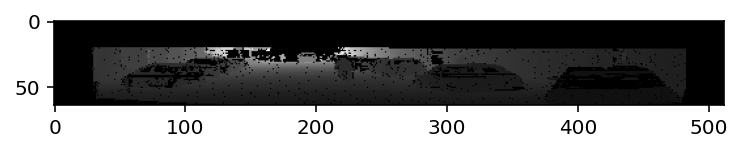

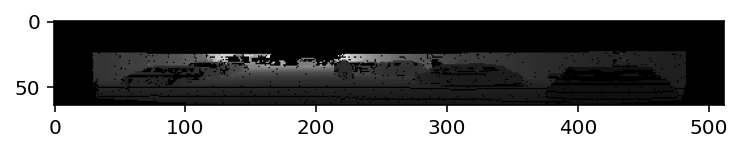

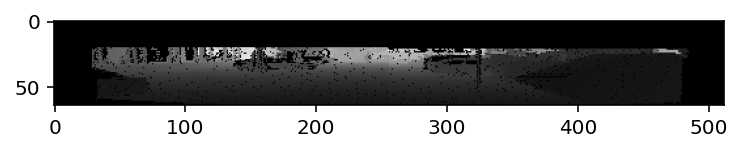

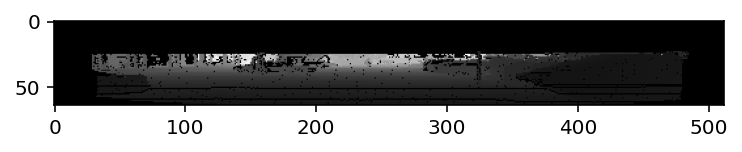

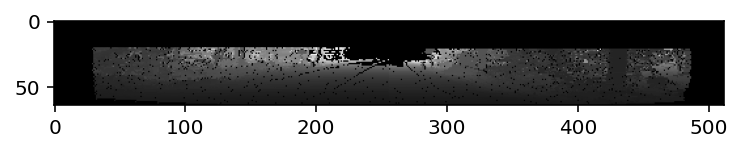

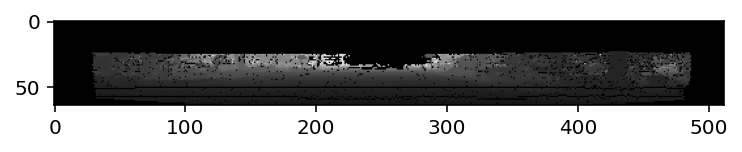

In [12]:
# compare two method of xyz2range
for i in range(0,len(dataset)):
        # break
    if i == 5:
        break
    item = dataset.dataset.get_sensor_data(i+342)
        # print(input_dict)
    points = item['lidar']['points']        
    # imageio.imwrite(fig_path + 'range_map_{:d}.jpg'.format(i),
    # range_map.astype(np.uint8))

    range_map = xyz2range_v2(points)
    depth = depth_from_feature_np(range_map, 255)
    plt.imshow(depth, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    
    range_map = xyz2range(points)
    depth = depth_from_feature_np(range_map, 255)
    plt.imshow(depth, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    

In [13]:



from second.data.preprocess import merge_second_batch, merge_second_batch_multigpu
from second.pytorch.train import _worker_init_fn
num_gpu=1
collate_fn= merge_second_batch
multi_gpu = False
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=input_cfg.batch_size * num_gpu,
        shuffle=True,
        num_workers=input_cfg.preprocess.num_workers * num_gpu,
        pin_memory=False,
        collate_fn=collate_fn,
        worker_init_fn=_worker_init_fn,
        drop_last=not multi_gpu)

In [14]:
#dataloader.__dir__()


In [15]:
examples = []
loop_i = 0
for example in dataloader:
    loop_i += 1
    if loop_i > 10:
        break
    examples.append(example)


WORKER 0 seed: 1588644073
WORKER 1 seed: 1588644074
WORKER 2 seed: 1588644075
WORKER 3 seed: 1588644076


/home/gx/GitHub/depconv/second/core/preprocess.py:463: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float32, 2d, A), array(float32, 2d, C))
  points[i:i + 1, :3] = points[i:i + 1, :3] @ rot_mat_T[j]
/home/gx/GitHub/depconv/second/core/preprocess.py:463: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float32, 2d, A), array(float32, 2d, C))
  points[i:i + 1, :3] = points[i:i + 1, :3] @ rot_mat_T[j]
/home/user/anaconda3/envs/depconv/lib/python3.7/site-packages/numba/core/typing/npydecl.py:943: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float32, 2d, A), array(float32, 2d, C))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/user/anaconda3/envs/depconv/lib/python3.7/site-packages/numba/core/typing/npydecl.py:943: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float32, 2d, A), array(float32, 2d, C))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/gx/GitHub/

/home/gx/GitHub/depconv/second/core/geometry.py:272: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "points_in_convex_polygon_jit" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "core/geometry.py", line 296:
def points_in_convex_polygon_jit(points, polygon, clockwise=True):
    <source elided>
    cross = 0.0
    for i in range(num_points):
    ^

  @numba.jit
/home/gx/GitHub/depconv/second/core/geometry.py:272: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "points_in_convex_polygon_jit" failed type inference due to: Invalid use of Function(<built-in function getitem>) with argument(s) of type(s): (array(float32, 3d, C), Tuple(slice<a:b>, list(int64), slice<a:b>))
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:

/home/gx/GitHub/depconv/second/core/geometry.py:272: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "points_in_convex_polygon_jit" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "core/geometry.py", line 296:
def points_in_convex_polygon_jit(points, polygon, clockwise=True):
    <source elided>
    cross = 0.0
    for i in range(num_points):
    ^

  @numba.jit
/home/user/anaconda3/envs/depconv/lib/python3.7/site-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "points_in_convex_polygon_jit" was compiled in object mode without forceobj=True, but has lifted loops.

File "core/geometry.py", line 283:
def points_in_convex_polygon_jit(points, polygon, clockwise=True):
    <source elided>
    # first convert polygon to directed lines
    num_points_of_polygon = polygon.shape[1]
    ^

  state.func_ir.loc))
/home/user/anaconda3/envs/depconv/lib/python3.7/

/home/user/anaconda3/envs/depconv/lib/python3.7/site-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "points_in_convex_polygon_jit" was compiled in object mode without forceobj=True, but has lifted loops.

File "core/geometry.py", line 283:
def points_in_convex_polygon_jit(points, polygon, clockwise=True):
    <source elided>
    # first convert polygon to directed lines
    num_points_of_polygon = polygon.shape[1]
    ^

  state.func_ir.loc))
/home/user/anaconda3/envs/depconv/lib/python3.7/site-packages/numba/core/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "core/geometry.py", line 283:
def points_in_convex_polygon_jit(points, polygon, clockwise=True):
    <source e

In [16]:
examples[3]

{'voxels': array([[[13.310402 , 12.385252 ,  0.8298772,  0.25     ],
         [13.256527 , 12.374445 ,  0.8288476,  0.45     ],
         [13.214249 , 12.412953 ,  0.8288476,  0.33     ],
         [ 0.       ,  0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ,  0.       ]],
 
        [[13.165222 , 12.44389  ,  0.827818 ,  0.59     ],
         [ 0.       ,  0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ,  0.       ]],
 
        [[13.156917 , 12.514716 ,  0.8288476,  0.42     ],
         [ 0.       ,  0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       ,  0.       ]],
 
        ...,
 
        [[ 6.0662394,  2.35071  , -1.6988802,  0.27     ],
         [ 6.06662  , 

In [17]:
examples[3]["feature"].shape
# B, C, H, W

(1, 5, 64, 512)

In [18]:
depths = []
for ex in examples:
    feature_np = ex["feature"]
    feature = torch.tensor(feature_np)
    depth = init_depth_from_feature(feature, 128)
    depths.append(depth)

In [19]:
depths[0].shape

torch.Size([1, 64, 512])

In [20]:

def plot_depth(depth):
    """
    depth: int tensor of shape(H, W)
    """
    H, W = depth.shape
    arr = np.asarray(depth)
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
    plt.show()
    

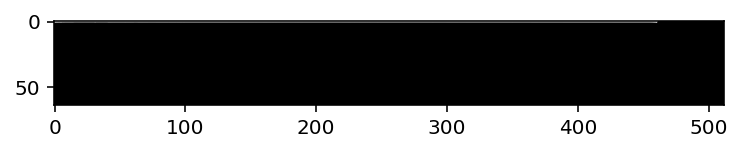

In [21]:
plot_depth(depths[0][0])

In [22]:
for d in depths:
    plot_depth(d[2])

IndexError: index 2 is out of bounds for dimension 0 with size 1

In [ ]:
import torch.nn.functional as F
for d in depths:
    d_ = d
    d_small = F.max_pool2d(d_.float(), 3, padding=1, stride=(1,2)).long()
    plot_depth(d_small[2])

In [ ]:
import torch.nn.functional as F
for d in depths:
    d_ = d
    d_small = F.max_pool2d(d_.float(), 3, padding=1, stride=(1,2)).long()
    d_small_2 = F.max_pool2d(d_small.float(), 3, padding=1, stride=(1,2)).long()
    
    plot_depth(d_small_2[2]//2)